# In the land of activity analysis
- Used the fitbit API to collect personal data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime

%matplotlib inline

In [3]:
# import data previously collected and saved as csv
acall_df = pd.read_csv('./downloads/acsummaryall.csv')

In [4]:
# quick look at the dataframe
acall_df.head()

,Date,DOW,Calories_total,Calories_bmr,Steps,Floors,Distance_mile,Elevation_foot,Sedentary_min,Light_min,...,Very_min,HR_meanresting,HR_outrange_cal,HR_outrange_min,HR_fatburn_cal,HR_fatburn_min,HR_cardio_cal,HR_cardio_min,HR_peak_cal,HR_peak_min
0,2018-04-15,Sunday,2451,1359,5174,10,1.86,100,466,288,...,30,53,1493.31360,1227,901.14240,205,56.64000,8,0,0
1,2018-04-16,Monday,1887,1359,3487,25,1.14,250,536,160,...,11,52,1604.13920,1377,269.60640,61,13.78240,2,0,0
2,2018-04-17,Tuesday,2113,1355,3155,35,0.98,350,644,201,...,22,53,1347.80624,1183,645.65512,151,15.25392,2,0,0
3,2018-04-18,Wednesday,2258,1354,3562,14,1.23,140,558,164,...,66,53,1437.63648,1280,640.68480,134,176.96448,24,0,0
4,2018-04-19,Thursday,2390,1354,3331,28,1.18,280,627,221,...,34,53,1382.19992,1218,911.81184,208,90.65456,12,0,0


In [5]:
grouped_DOW = acall_df.groupby('DOW').mean()
grouped_DOW = grouped_DOW.reindex(index = ['Monday','Tuesday','Wednesday', 'Thursday',
                                           'Friday', 'Saturday', 'Sunday'])
grouped_DOW = grouped_DOW.reset_index()
grouped_DOW

,DOW,Calories_total,Calories_bmr,Steps,Floors,Distance_mile,Elevation_foot,Sedentary_min,Light_min,Moderate_min,Very_min,HR_meanresting,HR_outrange_cal,HR_outrange_min,HR_fatburn_cal,HR_fatburn_min,HR_cardio_cal,HR_cardio_min,HR_peak_cal,HR_peak_min
0,Monday,1895.000000,1354.666667,5088.000000,19.666667,2.033333,196.666667,618.333333,160.000000,15.000000,15.0,53.000000,1479.903187,1308.000000,346.843200,78.000000,14.556013,2.000000,0.0,0.0
1,Tuesday,2192.666667,1353.333333,3272.666667,24.333333,1.026667,243.333333,467.333333,206.333333,29.666667,35.0,53.333333,1346.472813,1172.000000,671.171970,150.000000,68.496010,9.333333,0.0,0.0
2,Wednesday,2081.333333,1353.000000,3046.333333,16.666667,1.066667,166.666667,555.333333,170.333333,20.666667,40.0,53.000000,1519.329670,1325.333333,440.486907,95.333333,115.758937,16.333333,0.0,0.0
3,Thursday,2314.000000,1353.000000,3639.000000,32.000000,1.170000,320.000000,509.000000,211.000000,44.000000,45.5,52.500000,1376.924690,1177.500000,694.249500,155.000000,159.521840,22.000000,0.0,0.0
4,Friday,1794.500000,1352.500000,3119.500000,15.000000,1.110000,150.000000,564.000000,168.500000,10.000000,2.5,52.500000,1554.146850,1352.500000,207.198040,53.500000,0.000000,0.000000,0.0,0.0
5,Saturday,2092.500000,1352.500000,3806.500000,14.000000,1.390000,140.000000,601.500000,199.500000,19.000000,38.5,53.000000,1412.568695,1182.000000,508.705380,114.000000,38.530100,5.500000,0.0,0.0
6,Sunday,2246.666667,1354.666667,4897.666667,11.000000,1.830000,110.000000,707.333333,258.000000,36.000000,24.0,53.000000,1569.705340,1248.666667,563.885350,128.333333,62.428233,8.666667,0.0,0.0


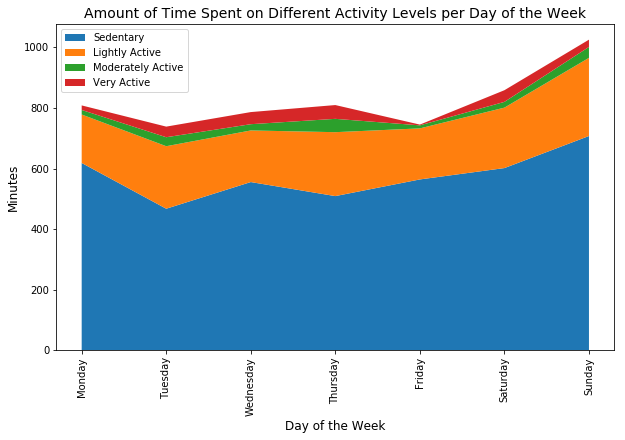

In [6]:
# plot stacked area chart for different activity levels

x = grouped_DOW.index
y_df = grouped_DOW[['Sedentary_min', 'Light_min', 'Moderate_min', 'Very_min']]
y = y_df.values.T

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Amount of Time Spent on Different Activity Levels per Day of the Week', fontsize=14)

plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Minutes', fontsize=12)

weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(weekday_list, rotation=90)

plt.stackplot(x, y, labels=['Sedentary', 'Lightly Active', 'Moderately Active', 'Very Active'])
plt.legend(loc='upper left')
plt.show()

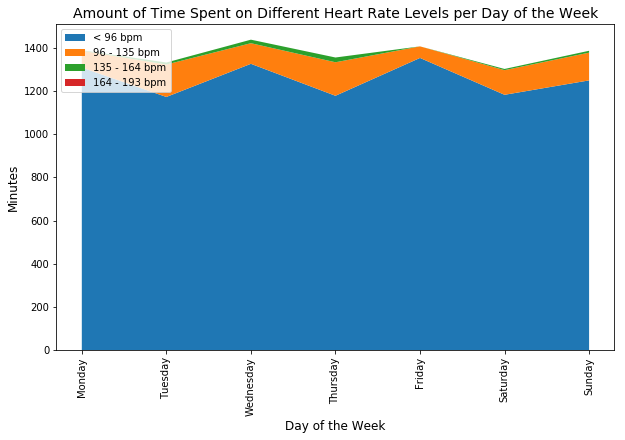

In [7]:
# plot stacked area chart for different heart rate levels

x = grouped_DOW.index
y_df = grouped_DOW[['HR_outrange_min', 'HR_fatburn_min', 'HR_cardio_min', 'HR_peak_min']]
y = y_df.values.T

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Amount of Time Spent on Different Heart Rate Levels per Day of the Week', fontsize=14)

plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Minutes', fontsize=12)

weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(weekday_list, rotation=90)

plt.stackplot(x, y, labels=['< 96 bpm', '96 - 135 bpm', '135 - 164 bpm', '164 - 193 bpm'])
plt.legend(loc='upper left')
plt.show()

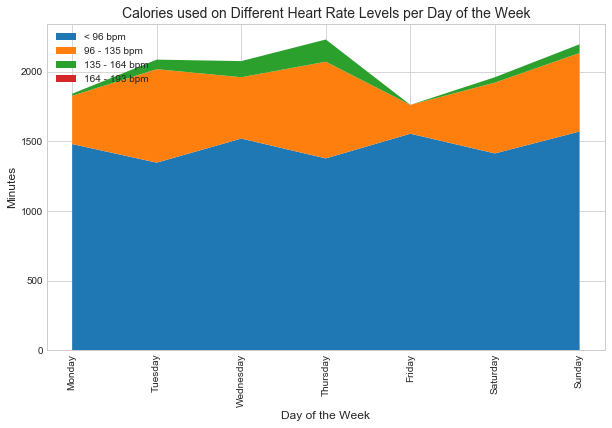

In [54]:
# plot stacked area chart for calories used up over different heart rate levels

x = grouped_DOW.index
y_df = grouped_DOW[['HR_outrange_cal', 'HR_fatburn_cal', 'HR_cardio_cal', 'HR_peak_cal']]
y = y_df.values.T

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Calories used on Different Heart Rate Levels per Day of the Week', fontsize=14)

plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Minutes', fontsize=12)

weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(weekday_list, rotation=90)

plt.stackplot(x, y, labels=['< 96 bpm', '96 - 135 bpm', '135 - 164 bpm', '164 - 193 bpm'])
plt.legend(loc='upper left')
plt.show()

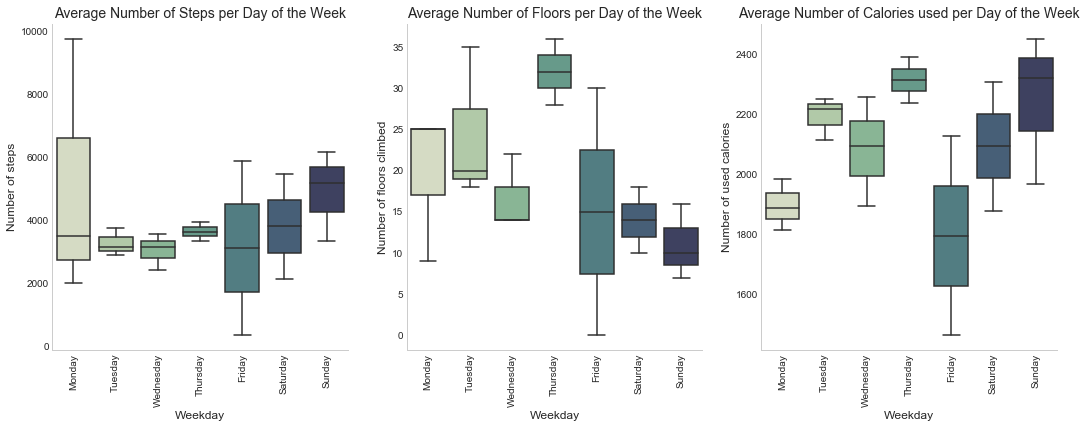

In [52]:
sns.set_style('whitegrid')
p = sns.cubehelix_palette(8, start=.5, rot=-.75)
f, axes = plt.subplots(1, 3, figsize=(18, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

s = sns.boxplot(x=acall_df['DOW'], y=acall_df['Steps'], order=order, ax=axes[0], palette=p)
s.set_title('Average Number of Steps per Day of the Week', fontsize=14)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
s.set_xlabel('Weekday', fontsize=12)
s.set_ylabel('Number of steps', fontsize=12)
s.grid(False)
s.spines["top"].set_visible(False)  
s.spines["right"].set_visible(False)

f = sns.boxplot(x=acall_df['DOW'], y=acall_df['Floors'], order=order, ax=axes[1], palette=p)
f.set_title('Average Number of Floors per Day of the Week', fontsize=14)
f.set_xticklabels(f.get_xticklabels(),rotation=90)
f.set_xlabel('Weekday', fontsize=12)
f.set_ylabel('Number of floors climbed', fontsize=12)
f.grid(False)
f.spines["top"].set_visible(False)  
f.spines["right"].set_visible(False)

c = sns.boxplot(x=acall_df['DOW'], y=acall_df['Calories_total'], order=order, ax=axes[2], palette=p)
c.set_title('Average Number of Calories used per Day of the Week', fontsize=14)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_xlabel('Weekday', fontsize=12)
c.set_ylabel('Number of used calories', fontsize=12)
c.grid(False)
c.spines["top"].set_visible(False)  
c.spines["right"].set_visible(False)

In [86]:
# import data previously collected and saved as csv
acdetailall_df = pd.read_csv('./downloads/acdetailsall.csv')

In [114]:
acdetailall_df.dtypes

Date               object
DOW                object
Time               object
Name               object
Calories            int64
Duration            int64
Active_Duration     int64
Sedentary_min       int64
Light_min           int64
Moderate_min        int64
Very_min            int64
HR_mean             int64
HR_outrange_min     int64
HR_fatburn_min      int64
HR_cardio_min       int64
HR_peak_min         int64
dtype: object

In [115]:
acdetailall_df['Name'] = acdetailall_df['Name'].replace(['Aerobic Workout', 'Sport'], 'Workout')
acdetailall_df['Name'] = acdetailall_df['Name'].replace('Outdoor Bike', 'Bike')

In [116]:
acdetailall_df.head(10)

,Date,DOW,Time,Name,Calories,Duration,Active_Duration,Sedentary_min,Light_min,Moderate_min,Very_min,HR_mean,HR_outrange_min,HR_fatburn_min,HR_cardio_min,HR_peak_min
0,2018-04-15,Sunday,17:40:54,Workout,70,1382000,1382000,2,21,0,0,88,17,6,0,0
1,2018-04-15,Sunday,07:24:06,Yoga,524,9834000,7929000,17,60,35,20,108,23,103,6,0
2,2018-04-16,Monday,18:45:38,Yoga,228,3702000,3685000,12,31,10,8,104,21,39,2,0
3,2018-04-17,Tuesday,17:22:14,Yoga,417,8838000,7997000,42,71,13,7,99,54,79,0,0
4,2018-04-17,Tuesday,17:09:05,Bike,23,283000,279000,0,4,0,0,123,0,4,0,0
5,2018-04-17,Tuesday,08:45:41,Bike,82,973000,973000,0,5,5,6,106,6,8,2,0
6,2018-04-17,Tuesday,07:28:02,Bike,60,973000,973000,4,3,7,2,98,6,10,0,0
7,2018-04-18,Wednesday,18:52:17,Yoga,668,8502000,8303000,22,25,28,63,116,26,88,24,0
8,2018-04-19,Thursday,17:28:12,Yoga,307,7953000,6305000,37,67,0,1,98,47,58,0,0
9,2018-04-19,Thursday,07:38:34,Workout,388,5090000,5087000,1,24,42,17,112,5,77,3,0


In [140]:
grouped_act_mean = acdetailall_df.groupby(['Name']).mean()
grouped_act_mean['Sed_min_dur'] = grouped_act_mean['Sedentary_min'] / grouped_act_mean['Duration']
grouped_act_mean['Lig_min_dur'] = grouped_act_mean['Light_min'] / grouped_act_mean['Duration']
grouped_act_mean['Mod_min_dur'] = grouped_act_mean['Moderate_min'] / grouped_act_mean['Duration']
grouped_act_mean['Ver_min_dur'] = grouped_act_mean['Very_min'] / grouped_act_mean['Duration']
grouped_act_mean

,Calories,Duration,Active_Duration,Sedentary_min,Light_min,Moderate_min,Very_min,HR_mean,HR_outrange_min,HR_fatburn_min,HR_cardio_min,HR_peak_min,Sed_min_dur,Lig_min_dur,Mod_min_dur,Ver_min_dur
Name,,,,,,,,,,,,,,,,
Bike,69.833333,812500.0,8.103333e+05,0.666667,2.333333,4.166667,6.166667,114.666667,2.666667,8.5,2.166667,0.0,8.205128e-07,0.000003,0.000005,0.000008
Walk,196.500000,2252000.0,2.252000e+06,0.500000,9.500000,10.000000,17.500000,110.500000,2.500000,33.5,1.500000,0.0,2.220249e-07,0.000004,0.000004,0.000008
Workout,188.000000,2788000.0,2.787250e+06,1.000000,21.250000,19.750000,4.250000,93.500000,16.250000,29.5,0.750000,0.0,3.586801e-07,0.000008,0.000007,0.000002
Yoga,299.350000,5101500.0,4.538850e+06,14.750000,32.700000,11.150000,16.550000,108.500000,19.000000,50.5,6.150000,0.0,2.891306e-06,0.000006,0.000002,0.000003


In [142]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [143]:
grouped_act_mean_norm = normalize(grouped_act_mean)
grouped_act_mean_norm

,Calories,Duration,Active_Duration,Sedentary_min,Light_min,Moderate_min,Very_min,HR_mean,HR_outrange_min,HR_fatburn_min,HR_cardio_min,HR_peak_min,Sed_min_dur,Lig_min_dur,Mod_min_dur,Ver_min_dur
Name,,,,,,,,,,,,,,,,
Bike,0.000000,0.000000,0.000000,0.011696,0.000000,0.000000,0.144654,1.000000,0.010101,0.000000,0.262346,NaN,0.224213,0.000000,0.600734,0.971003
Walk,0.551884,0.335626,0.386660,0.000000,0.236004,0.374332,1.000000,0.803150,0.000000,0.595238,0.138889,NaN,0.000000,0.283502,0.460336,1.000000
Workout,0.514850,0.460597,0.530215,0.035088,0.622942,1.000000,0.000000,0.000000,0.833333,0.500000,0.000000,NaN,0.051195,1.000000,1.000000,0.000000
Yoga,1.000000,1.000000,1.000000,1.000000,1.000000,0.448128,0.928302,0.708661,1.000000,1.000000,1.000000,NaN,1.000000,0.744835,0.000000,0.275316


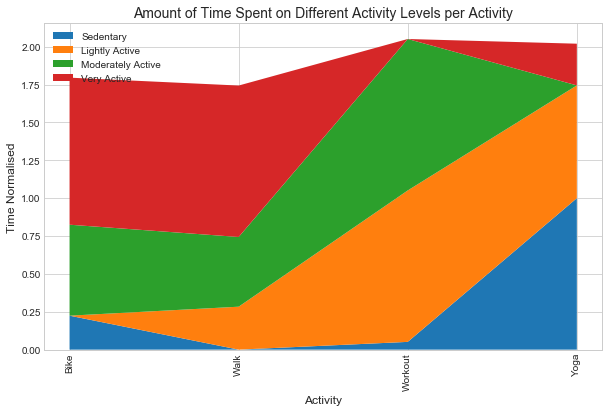

In [145]:
# plot stacked area chart for different activity levels

x = grouped_act_mean_norm.index
y_df = grouped_act_mean_norm[['Sed_min_dur', 'Lig_min_dur', 'Mod_min_dur', 'Ver_min_dur']]
y = y_df.values.T

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Amount of Time Spent on Different Activity Levels per Activity', fontsize=14)

plt.xlabel('Activity', fontsize=12)
plt.ylabel('Time Normalised', fontsize=12)

act_list = ['Bike', 'Walk', 'Workout', 'Yoga']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(act_list, rotation=90)

plt.stackplot(x, y, labels=['Sedentary', 'Lightly Active', 'Moderately Active', 'Very Active'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
# plot stacked area chart for different activity levels

x = grouped_act_mean.index
y_df = grouped_act_mean[['Sedentary_min', 'Light_min', 'Moderate_min', 'Very_min']]
y = y_df.values.T

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Amount of Time Spent on Different Activity Levels per Activity', fontsize=14)

plt.xlabel('Activity', fontsize=12)
plt.ylabel('Minutes', fontsize=12)

act_list = ['Bike', 'Walk', 'Workout', 'Yoga']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(act_list, rotation=90)

plt.stackplot(x, y, labels=['Sedentary', 'Lightly Active', 'Moderately Active', 'Very Active'])
plt.legend(loc='upper left')
plt.show()

In [120]:
act_names = acdetailall_df['Name'].unique()
act_names

array(['Workout', 'Yoga', 'Bike', 'Walk'], dtype=object)

ValueError: left cannot be >= right

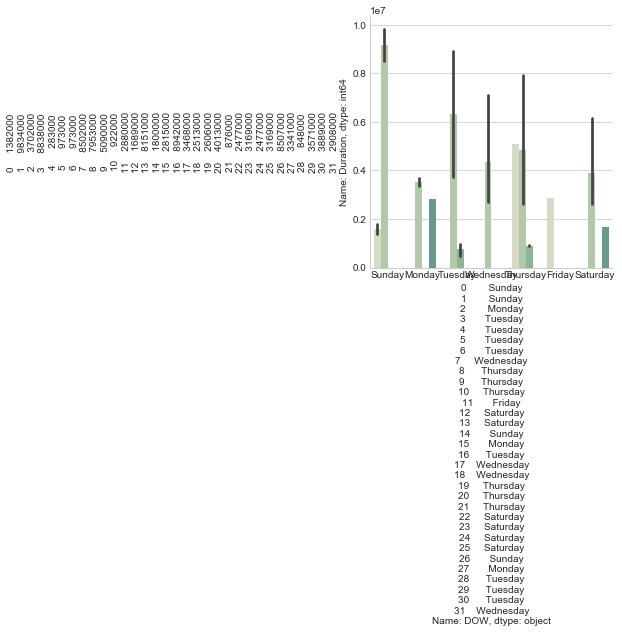

In [133]:
p = sns.cubehelix_palette(8, start=.5, rot=-.75)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



#data=acdetailall_df

g = sns.factorplot(x=acdetailall_df['DOW'],
                   y=acdetailall_df['Duration'],
                   hue=acdetailall_df["Name"],
                   data=acdetailall_df,
                   kind="bar", palette=p)

#g.set_title('Activity Count per Day of the Week', fontsize=14)
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
#g.set_xlabel('Weekday', fontsize=12)
#g.set_ylabel('Activity Count', fontsize=12)
#g.grid(False)
g.spines["top"].set_visible(False)  
g.spines["right"].set_visible(False)